In [1]:
# crim
# per capita crime rate by town.

# zn
# proportion of residential land zoned for lots over 25,000 sq.ft.

# indus
# proportion of non-retail business acres per town.

# chas
# Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

# nox
# nitrogen oxides concentration (parts per 10 million).

# rm
# average number of rooms per dwelling.

# age
# proportion of owner-occupied units built prior to 1940.

# dis
# weighted mean of distances to five Boston employment centres.

# rad
# index of accessibility to radial highways.

# tax
# full-value property-tax rate per $10,000.

# ptratio
# pupil-teacher ratio by town.

# black
# 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

# lstat
# lower status of the population (percent).

# medv
# median value of owner-occupied homes in $1000s


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
cols = ['crim', 'zn', 'indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']

In [4]:
df = pd.read_csv('boston.csv', header=None)
df.columns = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']

In [5]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [29]:
plt.style.use('dark_background')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

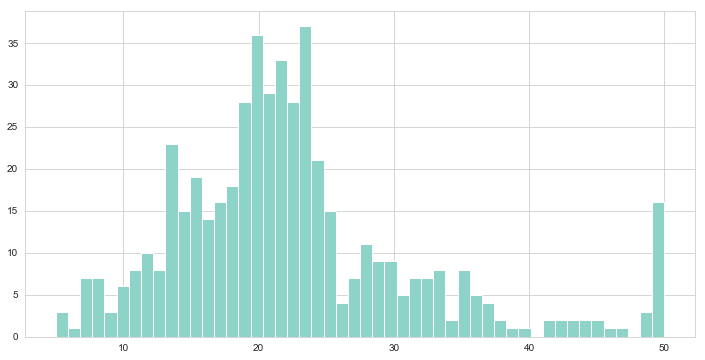

In [31]:
#histogram of median values - the majority fall under the median, this could indicate "sprawl" ie. people moving away from
#the very expensive city center towards the suburbs to counter high prices.

df['medv'].hist(bins=50)

# sns.distplot(df['medv'],bins=30,kde=False)

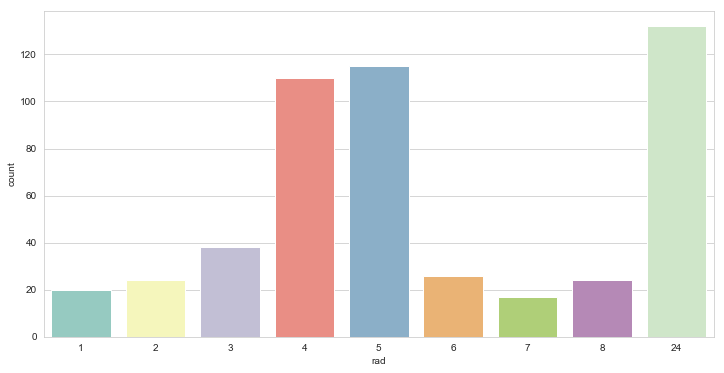

In [37]:
#Countplot - this graph is showing the distribution of properties with access to radial highways, it shows
#that the majority of properties have easy access to highways. This probably indicates that most people live in the suburbs.

sns.countplot(x='rad',data=df)

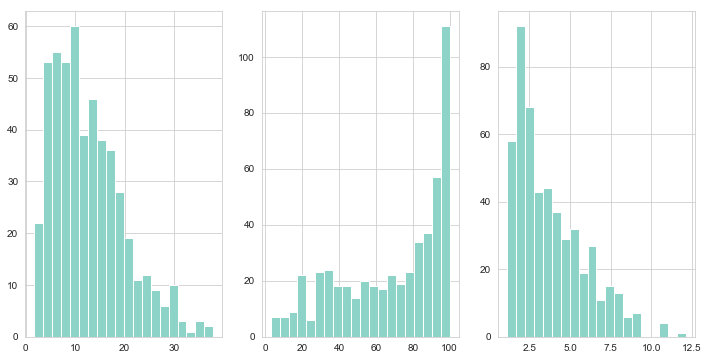

In [51]:
#Three more histograms 
#1.lower status of the population (percent)
#2.proportion of owner-occupied units built prior to 1940
#3.weighted mean of distances to five Boston employment centres.

plt.subplot(1,3,1)
df['lstat'].hist(bins=20)
plt.subplot(1,3,2)
df['age'].hist(bins=20)
plt.subplot(1,3,3)
df['dis'].hist(bins=20)


count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64


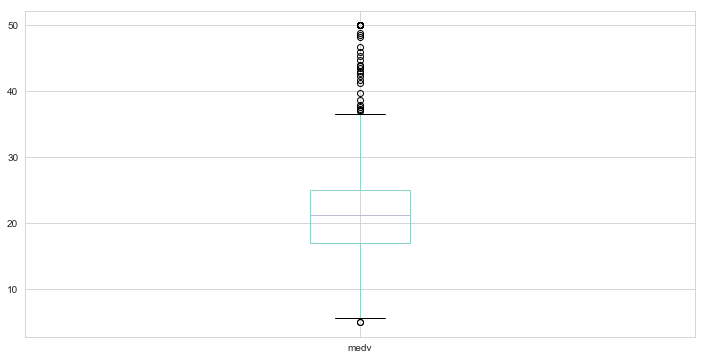

In [55]:
#Below is a boxplot - another way to visualize the median value, similar to the histogram. Notable are the numerous
#outliers. In other words there are many properties that fall about the Mean value.
print(df['medv'].describe())

df.boxplot(column='medv')

In [7]:
cor = df.corr()

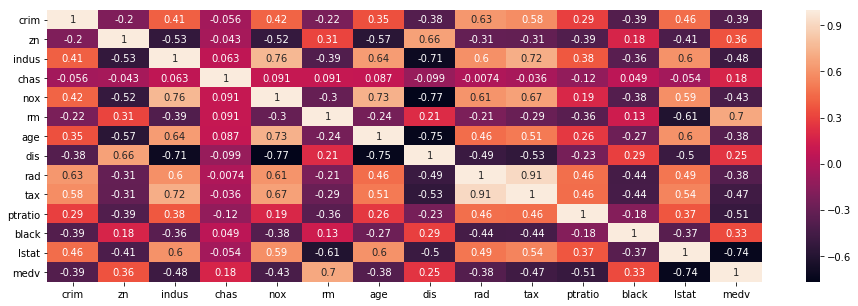

In [8]:
#Below is a heatmap which allows us to effectively assess correlation between the various columns. Most notable is
#the relationship between tax and rad

import matplotlib.pyplot as plt
i=plt.figure(figsize = (16,5))
sns.heatmap(cor, annot=True)

In [9]:
#OLS 
from statsmodels.formula.api import ols

#X are features
X = df[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax',"ptratio",'black','lstat']]
#prediction target
Y = df['medv']

model = ols("Y ~ X", data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 21 Oct 2019   Prob (F-statistic):          6.72e-135
Time:                        21:47:32   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [10]:
#list comp to isolate X
#x_columns = [col for col in beer.columns.values if col != "tpc"]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model


X = df[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax',"ptratio",'black','lstat']]
y = df['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
LR = linear_model.LinearRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.8128399611838465

In [12]:
intercepts = LR.intercept_
intercepts

39.291663619349606

In [13]:
coefficients = LR.coef_
coefficients

array([-9.48501010e-02,  4.94626698e-02,  1.01643372e-02,  2.36710701e+00,
       -1.95376816e+01,  3.42820153e+00,  6.98311882e-03, -1.54324305e+00,
        3.40736031e-01, -1.29262995e-02, -9.29019295e-01,  9.99806227e-03,
       -5.51434459e-01])

In [14]:
#RFE

from sklearn.feature_selection import RFE

rfe = RFE(LR, n_features_to_select=3, verbose=True)
rfe.fit(X_train, y_train)
print(rfe.ranking_)

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
[ 6  7 10  1  1  1 11  3  5  8  2  9  4]


In [25]:


X = df[['chas','nox','rm']]
y = pd.DataFrame(df['medv'])
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2)
LR.fit(X1_train, y1_train)
LR.score(X1_test, y1_test)

0.6061039392644442

In [16]:
X.head()

,chas,nox,rm
0,0,0.538,6.575
1,0,0.469,6.421
2,0,0.469,7.185
3,0,0.458,6.998
4,0,0.458,7.147


In [17]:
#NORMALIZATIONS examples

from sklearn import preprocessing
x_scaled = preprocessing.scale(X)
# print(x_scaled.shape)

from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)
# print(x_normalized.shape)

from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X)
x_standardized = transformer.transform(X)
# print(x_standardized.shape)

C:\Users\rborg\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\rborg\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rborg\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [18]:
X = x_scaled
y = pd.DataFrame(df['medv'])
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2)
LR.fit(X1_train, y1_train)
LR.score(X1_test, y1_test)

0.7003337322805496